In [1]:
# allows to import own functions
import sys
import os
import re
root_project = re.findall(r'(^\S*TFM)', os.getcwd())[0]
sys.path.append(root_project)

In [2]:
from lazypredict.Supervised import LazyRegressor
import pandas as pd
from src.features.add_features import add_features
import klib
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt
from src.utils.help_func import rename_indicators


/disks/hdd2T/Drive/TFM/conda_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
seed = 42
df_raw = pd.read_csv("../../data/processed/simulation_results_REV4.csv")
df_raw = df_raw.sample(15000, random_state=seed)
df_raw.head()

,i_country,R0,Tc,Tr,omega,ind_inf_1,ind_inf_2,ind_inf_sumgrad,ind_inf_p,ind_mort_1,ind_mort_2,ind_mort_3,ind_mort_sumgrad,n_closed,react_time,total_infected,total_deceased,total_recovered
46730,NIC,2.73,2.88,7.85,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16,13,1.00,0.00,0.00
48393,TTO,15.62,1.58,24.69,0.51,5.23,10.14,23.53,0.00,0.78,4.97,10.27,10.50,15,14,359605.00,333040.00,26437.00
41416,SUR,13.35,1.92,25.68,0.44,2.00,2.42,6.09,0.00,0.85,8.05,8.64,2.00,18,13,156036370.00,142061448.00,12594398.00
34506,VEN,12.88,1.58,20.29,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,15,1.00,0.00,0.00
43725,TKM,6.05,2.73,16.54,0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7,1,1.00,0.00,0.00


In [4]:
df = add_features(df_raw)
df = rename_indicators(df)

In [5]:
df = df.loc[df['total_deceased'] > 1 ]
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(10099, 39)
(9624, 39)


In [6]:
df.columns

Index(['i_country', 'R0', 'Tc', 'Tr', 'omega', 'ind_inf_1', 'ind_inf_2',
       'ind_inf_sumgrad', 'ind_inf_p', 'ind_mort_1', 'ind_mort_2',
       'ind_mort_3', 'ind_mort_sumgrad', 'n_closed', 'react_time',
       'total_infected', 'total_deceased', 'total_recovered', 'betweenness',
       'degree', 'closeness', 'country_pop', 'country_departures',
       'exposed_pop', 'total_deceased_log', 'ind_1.3', 'ind_1.4', 'ind_1.1',
       'ind_1.2', 'ind_2.2', 'ind_2.3', 'ind_2.4', 'ind_2.1',
       'betweenness_log', 'degree_log', 'country_pop_log',
       'country_departures_log', 'exposed_pop_log', 'affected_population'],
      dtype='object')

In [7]:
features = [
    'ind_1.1',
    'ind_1.2',
    'ind_1.3',
    'ind_1.4',
    'ind_2.1',
    'ind_2.2',
    'ind_2.3',
    'ind_2.4',
    'n_closed',
    'react_time',
    'betweenness_log',
    'degree_log',
    'closeness',
    'country_pop_log',
    'country_departures_log',
    'exposed_pop_log',
    'affected_population'
    ]

df = df[features]
df.head()

,ind_1.1,ind_1.2,ind_1.3,ind_1.4,ind_2.1,ind_2.2,ind_2.3,ind_2.4,n_closed,react_time,betweenness_log,degree_log,closeness,country_pop_log,country_departures_log,exposed_pop_log,affected_population
48393,3.16,-9.09,1.66,2.32,2.35,-0.24,1.60,2.33,15,14,-5.55,-2.11,0.44,14.14,6.62,19.97,0.00
41416,1.81,-9.17,0.69,0.88,0.69,-0.16,2.09,2.16,18,13,-8.14,-2.92,0.39,13.26,6.70,19.25,0.02
24656,10.98,-6.05,8.35,9.57,9.95,-0.63,-0.05,1.79,4,9,-9.58,-2.14,0.39,17.80,9.51,21.92,0.47
22411,13.00,1.54,9.72,8.97,9.55,-2.09,-2.18,-0.08,2,7,-5.85,-2.92,0.39,11.58,7.01,19.62,0.44
936,12.07,-8.47,9.18,10.23,10.57,-0.91,-0.60,1.35,7,19,-3.48,-0.57,0.56,21.05,12.92,22.21,0.13


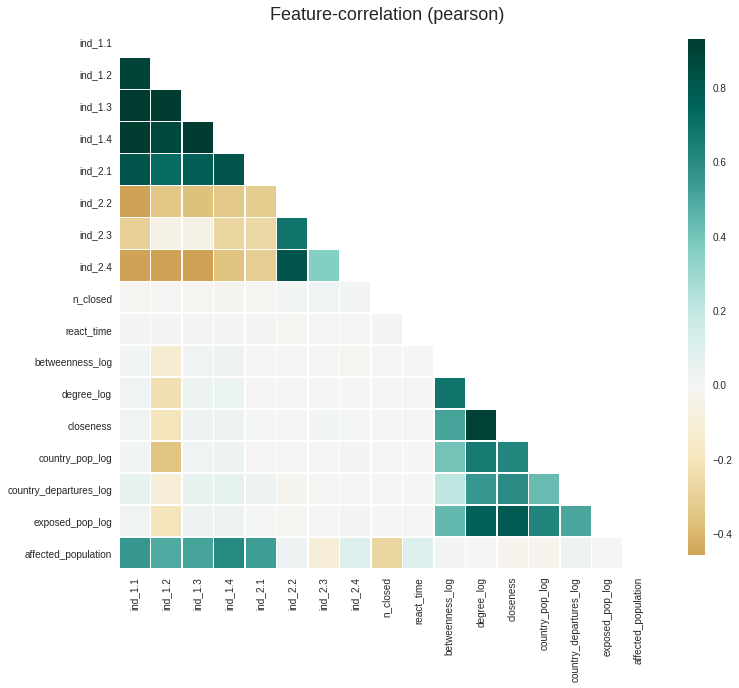

In [8]:
klib.corr_plot(df, annot=False);

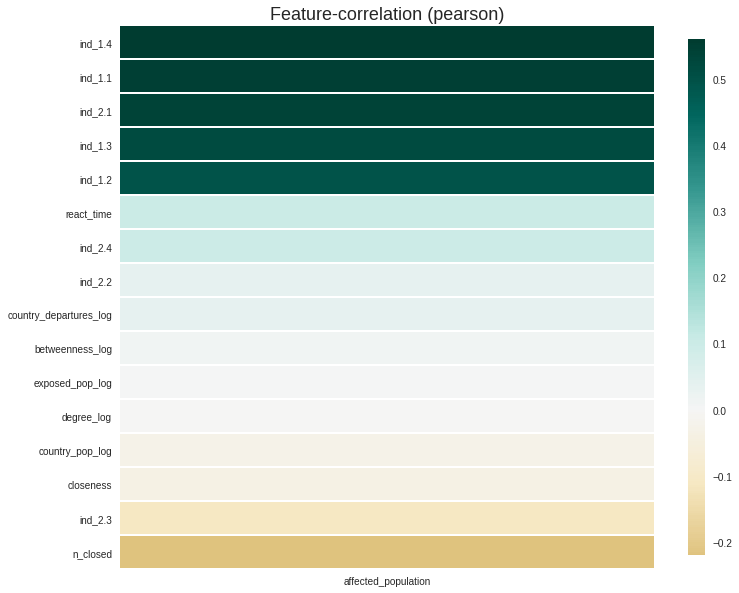

In [9]:
klib.corr_plot(df, target='affected_population', annot=False);

In [10]:
def plot_predictions(y_test, y_predicted, samples=20):

    df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
    df_predicted.sample(samples).plot(kind='barh', figsize=(10, 20))
    plt.show()
    return None

def results_estimator(y_test, y_pred):

    print(f"R2 in test\n{r2_score(y_test, y_pred)}")
    print(
        f"RMSE in test:\n{mean_squared_error(y_test, y_pred, squared=False)}")
    print(f"MAE in test:\n{mean_absolute_error(y_test, y_pred)}")
    return None

def plot_residuals(y_test, y_pred):
    resid = y_test - y_pred
    plt.scatter(y_pred, resid)
    plt.title('Residual plot')
    plt.xlabel('y_pred')
    plt.ylabel('residual')
    return None

def scatter_subplots(df, target, figsize=(15, 20)):
    features = df.drop(target, axis=1).select_dtypes(exclude=['object']).columns
    
    fig, ax = plt.subplots(8,2, figsize=figsize)
    fig.subplots_adjust(hspace = .5, wspace=.1)
    ax = ax.ravel()
    for i, feat in zip(range(len(ax)), features):
        ax[i].scatter(df[feat], df[target])
        ax[i].set(title=f"{target} vs {feat}")
    plt.tight_layout()

In [11]:
X = df.drop('affected_population', axis=1)
y = df['affected_population']
y = y.replace(0, np.finfo(float).eps)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  random_state=seed)

In [12]:
pipe = Pipeline([
    ('preprocess', StandardScaler()),
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [13]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None, predictions=True)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 88%|████████▊ | 38/43 [00:55<00:07,  1.57s/it]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [01:21<00:00,  1.91s/it]


In [14]:
models

,R-Squared,RMSE,Time Taken
Model,,,
LGBMRegressor,0.92,0.06,6.79
HistGradientBoostingRegressor,0.92,0.06,34.03
XGBRegressor,0.91,0.06,19.79
NuSVR,0.90,0.06,4.65
RandomForestRegressor,0.90,0.06,4.51
ExtraTreesRegressor,0.88,0.07,1.76
BaggingRegressor,0.88,0.07,0.49
SVR,0.87,0.07,0.35
GradientBoostingRegressor,0.86,0.08,1.56


In [15]:
y_pred = predictions['MLPRegressor']

results_estimator(y_test, y_pred )

R2 in test
0.8214910589671334
RMSE in test:
0.08524125828367608
MAE in test:
0.06230234040451061


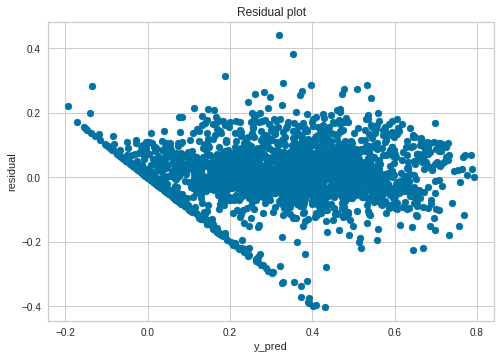

In [16]:
plot_residuals(y_test.values, y_pred.values)

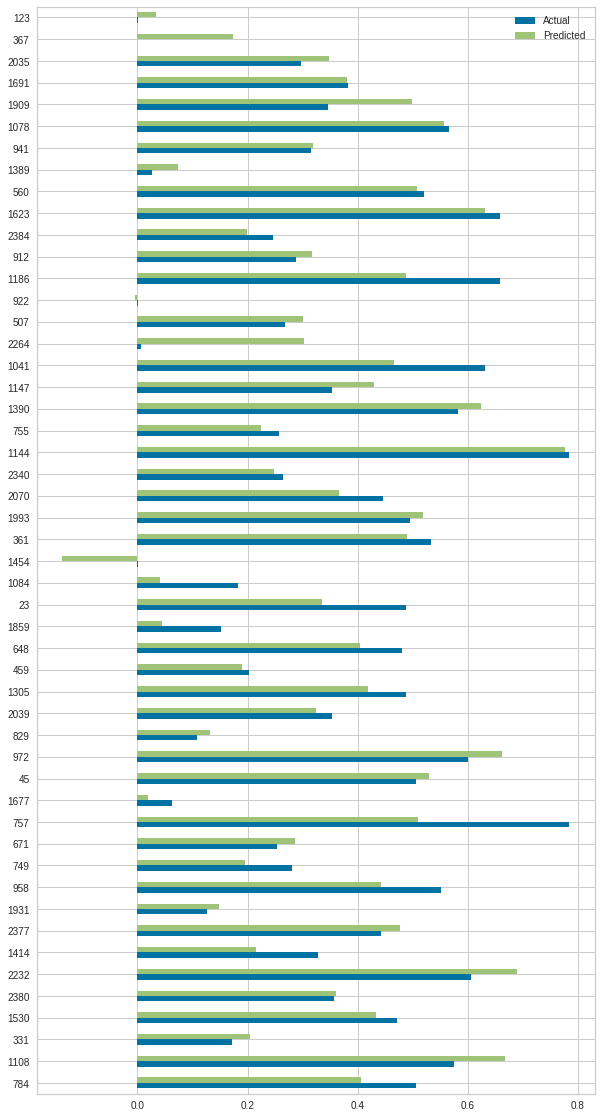

In [17]:
plot_predictions(y_test.reset_index(drop=True), y_pred, samples=50)